In [24]:
import os

from denovo_utils.data import Run
from denovo_utils.parsers import DenovoEngineConverter

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from denovo_utils.analysis.metrics import load_seq_score_dicts
from denovo_utils.analysis.metrics import get_match_score_table, get_prc_curve

from psm_utils import Peptidoform
from tqdm import tqdm
from peak_pack.utils import calculate_ppm
import seaborn as sns
import pandas as pd

# Orbitrap metaproteomics

In [21]:
root_results_dn = '/public/compomics3/Sam/PXD023217/denovo_results'
root_mgf = '/public/compomics3/Sam/PXD023217/mgf_filtered'
root_results_db = '/public/compomics3/Sam/PXD023217/search_results/sage/identification_all/sage'

# The other files should be rerun with ContraNovo due to bad spectrum_id parsing
run_names_orbitrap = [
    'F01_Fraction1',
    'F01_Fraction2',
    'F01_Fraction3',
    'F01_Fraction4',
    'S03',
    'S05',
    'S07',
]

run_names_timstof = [
    'F08_Rep1',
    'F08_Rep2',
]


engine_names = [
    # 'adanovo',
    # 'pihelixnovo',
    # 'piprimenovo',
    'casanovo',
    'instanovo',
    'contranovo',
    'novob',
    'pepnet',
]

runs = {}
for run_name in run_names_orbitrap:
    print(f"Run: {run_name}")
    run = Run(run_name)

    mgf_path = os.path.join(root_mgf, run_name + '.mgf')

    parser = DenovoEngineConverter.select('sage')
    psmlist_gt = parser.parse(
        result_path=os.path.join(root_results_db, run_name + '.sage.tsv'),
        mgf_path=mgf_path
    )
    run.load_data(
        psmlist=psmlist_gt.get_rank1_psms(),
        score_names=[],
        is_ground_truth=True
    )

    for engine_name in engine_names:
        print(f'loading {engine_name}')
        parser = DenovoEngineConverter.select(engine_name)
        psmlist_denovo = parser.parse(
            result_path=os.path.join(root_results_dn, engine_name, run_name + f'.{engine_name}.some_extension'),
            mgf_path=mgf_path
        )
        run.load_data(
            psmlist=psmlist_denovo,
            score_names=[],
            is_ground_truth=False
        )
    
    runs[run_name] = run

Run: F01_Fraction1


100%|██████████| 8796/8796 [00:00<00:00, 410758.52it/s]


loading casanovo


100%|██████████| 9045/9045 [00:00<00:00, 176146.16it/s]


loading instanovo


100%|██████████| 8983/8983 [00:00<00:00, 319473.55it/s]


loading contranovo


100%|██████████| 4525/4525 [00:00<00:00, 220693.80it/s]


loading novob


100%|██████████| 8735/8735 [00:00<00:00, 332063.64it/s]


loading pepnet


100%|██████████| 9157/9157 [00:00<00:00, 204445.00it/s]


Run: F01_Fraction2


100%|██████████| 77580/77580 [00:04<00:00, 16604.07it/s]


loading casanovo


100%|██████████| 78297/78297 [00:03<00:00, 24502.44it/s]


loading instanovo


100%|██████████| 78350/78350 [00:06<00:00, 12556.79it/s]


loading contranovo


100%|██████████| 39184/39184 [00:06<00:00, 6289.90it/s] 


loading novob


100%|██████████| 76483/76483 [00:01<00:00, 49379.79it/s]


loading pepnet


100%|██████████| 78706/78706 [00:03<00:00, 25079.45it/s]


Run: F01_Fraction3


100%|██████████| 67764/67764 [00:01<00:00, 59887.52it/s] 


loading casanovo


100%|██████████| 68228/68228 [00:02<00:00, 29515.02it/s]


loading instanovo


100%|██████████| 68212/68212 [00:07<00:00, 9320.18it/s] 


loading contranovo


100%|██████████| 34172/34172 [00:01<00:00, 28838.01it/s]


loading novob


100%|██████████| 66540/66540 [00:01<00:00, 60355.74it/s]


loading pepnet


100%|██████████| 68806/68806 [00:02<00:00, 30398.00it/s]


Run: F01_Fraction4


100%|██████████| 64930/64930 [00:00<00:00, 92675.41it/s]


loading casanovo


100%|██████████| 65173/65173 [00:01<00:00, 36888.28it/s]


loading instanovo


100%|██████████| 65259/65259 [00:00<00:00, 107908.55it/s]


loading contranovo


100%|██████████| 32688/32688 [00:00<00:00, 56441.53it/s]


loading novob


100%|██████████| 63831/63831 [00:00<00:00, 117248.08it/s]


loading pepnet


100%|██████████| 67034/67034 [00:01<00:00, 62508.92it/s]


Run: S03


100%|██████████| 123132/123132 [00:08<00:00, 15382.01it/s] 


loading casanovo


100%|██████████| 136292/136292 [00:04<00:00, 32098.78it/s]


loading instanovo


100%|██████████| 137030/137030 [00:02<00:00, 66608.91it/s]


loading contranovo


100%|██████████| 69047/69047 [00:02<00:00, 32945.29it/s]


loading novob


100%|██████████| 131605/131605 [00:09<00:00, 13661.30it/s]


loading pepnet


100%|██████████| 152378/152378 [00:12<00:00, 12447.75it/s]


Run: S05


100%|██████████| 191780/191780 [00:02<00:00, 68056.38it/s]


loading casanovo


100%|██████████| 209202/209202 [00:05<00:00, 36479.73it/s]


loading instanovo


100%|██████████| 210503/210503 [00:02<00:00, 75481.45it/s]


loading contranovo


100%|██████████| 105962/105962 [00:03<00:00, 35024.38it/s]


loading novob


100%|██████████| 203258/203258 [00:02<00:00, 73336.65it/s]


loading pepnet


100%|██████████| 232699/232699 [00:05<00:00, 39531.01it/s]


Run: S07


100%|██████████| 36926/36926 [00:00<00:00, 73568.27it/s]


loading casanovo


100%|██████████| 43053/43053 [00:01<00:00, 40176.06it/s]


loading instanovo


100%|██████████| 42808/42808 [00:00<00:00, 54032.74it/s]


loading contranovo


100%|██████████| 21691/21691 [00:00<00:00, 24416.23it/s]


loading novob


100%|██████████| 40981/40981 [00:00<00:00, 49096.16it/s]


loading pepnet


100%|██████████| 46808/46808 [00:01<00:00, 26152.70it/s]


In [22]:
for run in runs.values():
    for spectrum in run.spectra.values():
        spectrum.compare_gt(
            'sage',
            ignore_score=True
        )
denovo_engines = ['casanovo', 'novob', 'instanovo', 'pepnet', 'contranovo']

In [23]:
def get_match_score_tables(runs, common_spectra=True):

    tables_by_run = {}
    for filename, run in runs.items():
        if common_spectra:
            run_engine = run.get_common_spectra(engines=denovo_engines)

        tables = {}
        for engine in denovo_engines:
            if not common_spectra:
                run_engine = run.get_common_spectra([engine])
            t = get_match_score_table(
                run_engine,
                engine=engine,
                score_metadata=engine,
                eval_score_metadata='sage',
                refiner=None,
                return_table=True
            )
            tables[engine] = t

        tables_by_run[filename] = tables
    
    pr_tables = {engine: [] for engine in denovo_engines}
    for filename, tables in tables_by_run.items():
        for engine, table in tables.items():
            pr_tables[engine].append(table)
    
    pr_tables = {engine: pd.concat(tables, ignore_index=True) for engine, tables in pr_tables.items()}
    return pr_tables

In [25]:
pr_tables_common_spectra = get_match_score_tables(runs=runs, common_spectra=True)
pr_tables_all_spectra = get_match_score_tables(runs=runs, common_spectra=False)

In [26]:
# Calculate precision recall coverage when defined on common spectra
pr_rec_cov_dict = {}
for engine, tables in pr_tables_common_spectra.items():
    
    # total predicted here means all common spectra (shape of very df here)
    prc = get_prc_curve(tables, len(tables))
    pr_rec_cov_dict[engine] = {
        'precision': prc.precision.to_numpy(),
        'recall': prc.recall.to_numpy(),
        'coverage': prc.coverage.to_numpy()
    }

# Calculate precision recall coverage on complete set of database results
# total predicted here means all db results
all_db_peptides = sum([len(run.spectra.keys()) for run in runs.values()])
pr_rec_cov_dict_all = {}
for engine, tables in pr_tables_all_spectra.items():
    prc = get_prc_curve(tables, all_db_peptides)
    pr_rec_cov_dict_all[engine] = {
        'precision': prc.precision.to_numpy(),
        'recall': prc.recall.to_numpy(),
        'coverage': prc.coverage.to_numpy()
    }

/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464

plotting casanovo
plotting novob
plotting instanovo
plotting pepnet
plotting contranovo


Text(0, 0.5, 'Peptide Precision')

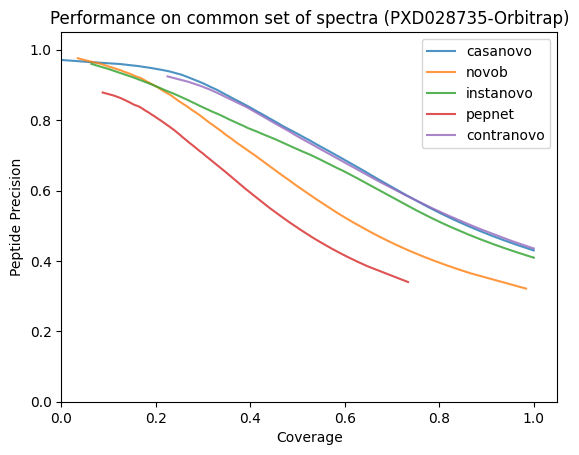

In [27]:
# plotting a precision coverage curve
for engine, pr_dict in pr_rec_cov_dict.items():
    print("plotting", engine)
    sns.lineplot(
        x=pr_dict["coverage"],
        y=pr_dict["precision"],
        label=engine,   # Label for style legend
        alpha=.8,
    )

plt.xlim((0,1.05))
plt.ylim((0,1.05))
plt.title("Performance on common set of spectra (PXD028735-Orbitrap)")
plt.xlabel('Coverage')
plt.ylabel('Peptide Precision')

Barplot

In [28]:
barplot_data = {
    'engine': [],
    'run': [],
    'precision': [],
    'coverage': []
}

for engine in denovo_engines:
    engine_performance = {}

    for run_name, run in runs.items():

        n_all = len(run.spectra)
        run_engine = run.get_common_spectra(engines=[engine])
        n_predicted = len(run_engine.spectra)
        n_correct = 0
        for spectrum in run_engine.spectra.values():
            psm = spectrum.get_psms_by_engine(engine)[0]
            if psm.evaluation['sage'].error_type=="match":
                n_correct += 1

        coverage = n_predicted/n_all
        precision = n_correct/n_predicted
        
        barplot_data['coverage'].append(coverage)
        barplot_data['precision'].append(precision)
        barplot_data['engine'].append(engine)
        barplot_data['run'].append(run_name)

In [29]:
barplot_data = pd.DataFrame(barplot_data).sort_values(by='precision')

In [30]:
def plot_precision_coverage_barplot(barplot_data):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the first barchart (pointing to the right)
    bar1 = sns.barplot(data=barplot_data, y='run', x='precision', hue='engine', ax=ax)

    # Plot the second barchart (pointing to the left)
    bar2 = sns.barplot(data=barplot_data, y='run', x=[-v for v in barplot_data['coverage']], hue='engine', ax=ax)

    # Add the vertical line at x=0
    ax.axvline(0, color='black', linewidth=1)

    # Customize the plot
    ax.set_ylabel('Sample type')

    # Set x-axis limits to ensure symmetry
    max_val = max(max(barplot_data['precision']), max(barplot_data['coverage']))
    ax.set_xlim(-int(max_val), int(max_val))
    ax.set_xticks(range(-int(max_val), int(max_val) + 1, 5))

    # Remove default x-axis label
    ax.set_xlabel('')

    # Add custom x-axis labels for Precision and Coverage
    ax.text(max_val / 2, -0.7, 'Precision', va='center', ha='center', fontsize=12)
    ax.text(-max_val / 2, -0.7, 'Coverage', va='center', ha='center', fontsize=12)

    # Adjust the legend to appear outside the plot
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(dict(zip(labels, handles)).items())
    ax.legend(
        [handle for _, handle in unique_labels],
        [label for label, _ in unique_labels],
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        title="De novo tool"
    )

    for p in bar1.patches:
        width = p.get_width()  # Get the width of the bar
        percentage = (width / max_val) * 100  # Calculate the percentage of max width
        ax.annotate(f'{abs(percentage):.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                    va='center', ha='left', fontsize=8, color='black')

    plt.tight_layout()
    plt.show()

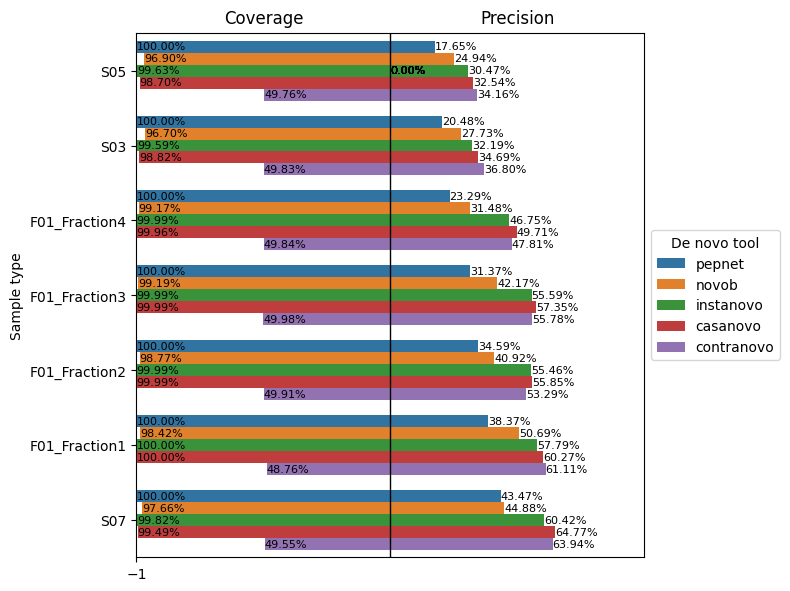

In [31]:
plot_precision_coverage_barplot(barplot_data)

# Metaproteomics timsTOF

In [33]:
run_names_timstof = [
    'F08_Rep1',
    'F08_Rep2'
]

runs_timstof = {}
for run_name in run_names_timstof:
    print(f"Run: {run_name}")
    run = Run(run_name)

    mgf_path = os.path.join(root_mgf, run_name + '.mgf')

    parser = DenovoEngineConverter.select('sage')
    psmlist_gt = parser.parse(
        result_path=os.path.join(root_results_db, run_name + '.sage.tsv'),
        mgf_path=mgf_path
    )
    run.load_data(
        psmlist=psmlist_gt.get_rank1_psms(),
        score_names=[],
        is_ground_truth=True
    )

    for engine_name in engine_names:
        print(f'loading {engine_name}')
        parser = DenovoEngineConverter.select(engine_name)
        psmlist_denovo = parser.parse(
            result_path=os.path.join(root_results_dn, engine_name, run_name + f'.{engine_name}.some_extension'),
            mgf_path=mgf_path
        )
        run.load_data(
            psmlist=psmlist_denovo,
            score_names=[],
            is_ground_truth=False
        )
    
    runs_timstof[run_name] = run

Run: F08_Rep1


100%|██████████| 47356/47356 [00:00<00:00, 141508.42it/s]


loading casanovo


100%|██████████| 51130/51130 [00:00<00:00, 70599.25it/s]


loading instanovo


100%|██████████| 50058/50058 [00:14<00:00, 3566.72it/s]


loading contranovo


100%|██████████| 25544/25544 [00:00<00:00, 62964.15it/s]


loading novob


100%|██████████| 46854/46854 [00:00<00:00, 135684.82it/s]


loading pepnet


100%|██████████| 61489/61489 [00:01<00:00, 52773.37it/s]


Run: F08_Rep2


100%|██████████| 48063/48063 [00:00<00:00, 88415.21it/s]


loading casanovo


100%|██████████| 51429/51429 [00:01<00:00, 43900.93it/s]


loading instanovo


100%|██████████| 50405/50405 [00:00<00:00, 83544.61it/s]


loading contranovo


100%|██████████| 25681/25681 [00:00<00:00, 40969.20it/s]


loading novob


100%|██████████| 47411/47411 [00:00<00:00, 83670.95it/s]


loading pepnet


100%|██████████| 60567/60567 [00:01<00:00, 47416.77it/s]


In [34]:
for run in runs_timstof.values():
    for spectrum in run.spectra.values():
        spectrum.compare_gt(
            'sage',
            ignore_score=True
        )
denovo_engines = ['casanovo', 'novob', 'instanovo', 'pepnet', 'contranovo']

In [35]:
pr_tables_common_spectra_timstof = get_match_score_tables(runs=runs_timstof, common_spectra=True)
pr_tables_all_spectra_timstof = get_match_score_tables(runs=runs_timstof, common_spectra=False)

In [36]:
# Calculate precision recall coverage when defined on common spectra
pr_rec_cov_dict_timstof = {}
for engine, tables in pr_tables_common_spectra_timstof.items():
    
    # total predicted here means all common spectra (shape of very df here)
    prc = get_prc_curve(tables, len(tables))
    pr_rec_cov_dict_timstof[engine] = {
        'precision': prc.precision.to_numpy(),
        'recall': prc.recall.to_numpy(),
        'coverage': prc.coverage.to_numpy()
    }

/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci
/home/sam/DeNovo/cloned_denovo_repo/DeNovo_Benchmark/package_du/denovo_utils/analysis/metrics.py:464: RuntimeWarning: invalid value encountered in scalar divide
  precision = c/ci


plotting casanovo
plotting novob
plotting instanovo
plotting pepnet
plotting contranovo


Text(0, 0.5, 'Peptide Precision')

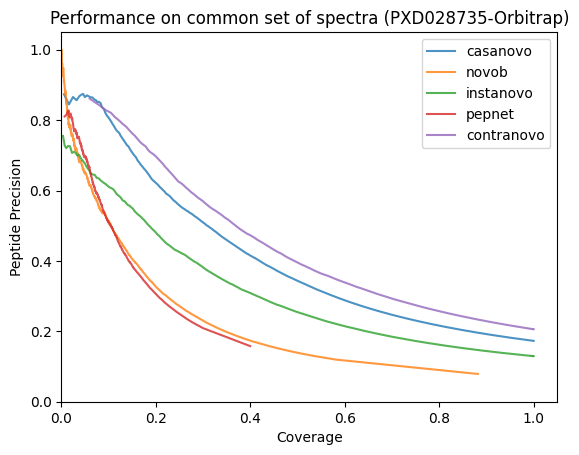

In [37]:
# plotting a precision coverage curve
for engine, pr_dict in pr_rec_cov_dict_timstof.items():
    print("plotting", engine)
    sns.lineplot(
        x=pr_dict["coverage"],
        y=pr_dict["precision"],
        label=engine,   # Label for style legend
        alpha=.8,
    )

plt.xlim((0,1.05))
plt.ylim((0,1.05))
plt.title("Performance on common set of spectra (PXD028735-Orbitrap)")
plt.xlabel('Coverage')
plt.ylabel('Peptide Precision')

In [38]:
barplot_data_timstof = {
    'engine': [],
    'run': [],
    'precision': [],
    'coverage': []
}

for engine in denovo_engines:
    engine_performance = {}

    for run_name, run in runs_timstof.items():

        n_all = len(run.spectra)
        run_engine = run.get_common_spectra(engines=[engine])
        n_predicted = len(run_engine.spectra)
        n_correct = 0
        for spectrum in run_engine.spectra.values():
            psm = spectrum.get_psms_by_engine(engine)[0]
            if psm.evaluation['sage'].error_type=="match":
                n_correct += 1

        coverage = n_predicted/n_all
        precision = n_correct/n_predicted
        
        barplot_data_timstof['coverage'].append(coverage)
        barplot_data_timstof['precision'].append(precision)
        barplot_data_timstof['engine'].append(engine)
        barplot_data_timstof['run'].append(run_name)

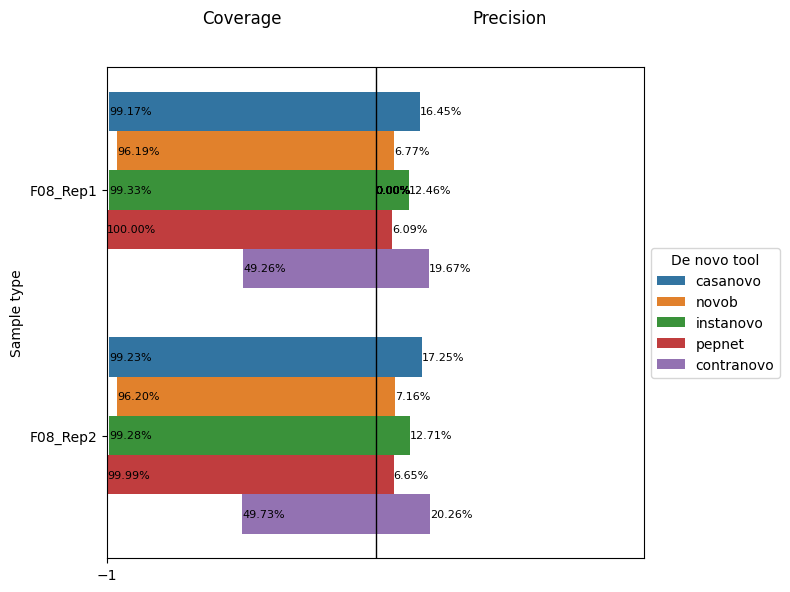

In [39]:
plot_precision_coverage_barplot(barplot_data_timstof)